<a href="https://colab.research.google.com/github/Saswata020/Decision_Tree_For_Classification/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business problem
 In this scenario appears to be related to the sales of car seats in different locations. The dataset contains various features that describe each location, such as competitor prices, community income levels, advertising budgets, population size, and more. The goal is likely to understand and potentially improve the sales of car seats at these locations.

Key aspects of the business problem and potential objectives could include:

* **Sales Analysis:** Understanding the factors that influence car seat sales and identifying patterns or trends in sales data.

* **Competitive Pricing:** Analyzing how competitor prices impact sales and whether adjusting pricing strategies is necessary to remain competitive.

* **Market Segmentation:** Identifying different market segments based on factors like income, education, and urban/rural location, and tailoring marketing and product strategies accordingly.

* **Advertising Impact:** Assessing the effectiveness of advertising budgets in driving sales and optimizing advertising strategies.

* **Shelving Quality:** Investigating whether the quality of shelving location (Bad, Good, Medium) affects sales and whether store layout improvements are needed.

* **Demographic Factors:** Analyzing how demographic factors like population size, average age, and education level relate to sales.

* **Location Strategy:** Understanding whether location (urban or rural) and geographical location (in the US or not) impact sales and making informed decisions about store expansion or closure.

# Features Informations :

* Sales : Unit sales (in thousands) at each location

* CompPrice : Price charged by competitor at each location

* Income : Community income level (in thousands of dollars)

* Advertising : Local advertising budget for company at each location (in thousands of dollars)

* Population : Population size in region (in thousands)

* Price : Price company charges for car seats at each site

* ShelveLoc : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* Age : Average age of the local population

* Education : Education level at each location

* Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* US : A factor with levels No and Yes to indicate whether the store is in the US or not

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd

# Import DecisionTreeClassifier for building decision tree models
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import preprocessing module for data preprocessing tasks
from sklearn import preprocessing

# Import the tree module for handling decision tree models
from sklearn import tree

# Import matplotlib.pyplot for data visualization, including tree plotting
import matplotlib.pyplot as plt

# Import plot_tree for visualizing the decision tree
from sklearn.tree import plot_tree

# Import Source from graphviz for visualizing decision trees (assuming graphviz is installed)
from graphviz import Source

# Import confusion_matrix and classification_report for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Import OneHotEncoder for categorical variable encoding
from sklearn.preprocessing import OneHotEncoder

# Import numpy for numerical operations
import numpy as np

# Import cross_val_score and GridSearchCV for cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV


In [61]:
# Loading the data
data = pd.read_csv('/content/drive/MyDrive/#Machine Learning/1.Decision tree/Carseats.csv')

# Top rows of the data
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [62]:
# Identify categorical columns
categorical_cols = ['ShelveLoc', 'Urban', 'US']

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the encoded dataset
print(data_encoded)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Good  Shelve

In [63]:
data=data_encoded

In [64]:
# Summary of the data
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.212500,0.547500,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.409589,0.498362,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,0.000000,1.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,0.000000,1.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Assuming 'data' is a pandas DataFrame
data['High_Sales'] = data['Sales'].apply(lambda x: 'Yes' if x > 8 else 'No')
data = data.iloc[:, 1:]
print(data['High_Sales'].value_counts())


No     236
Yes    164
Name: High_Sales, dtype: int64


In [66]:
# Assuming 'data' is your DataFrame with 'High_Sales' as the target variable
X = data.drop(columns=['High_Sales'])
y = data['High_Sales']

In [101]:
# Get the names of the features
feature_names = X.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
class_mod = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
class_mod.fit(X_train, y_train)

# Print feature importances
print("Feature Importances:")
print(class_mod.feature_importances_)

# Export the tree structure in text format with feature names
tree_structure = tree.export_text(class_mod, feature_names=feature_names)
print("Tree Structure:")

print(tree_structure)
#The first number (0.12034199) represents the importance of the first feature.
#The second number (0.12928037) represents the importance of the second feature.
#The third number (0.0938224) represents the importance of the third feature. And so on, with each subsequent number corresponding to a feature.

Feature Importances:
[0.12034199 0.12928037 0.0938224  0.00870358 0.29482502 0.10497663
 0.06904817 0.10011073 0.05208299 0.         0.02680812]
Tree Structure:
|--- Price <= 92.50
|   |--- CompPrice <= 101.00
|   |   |--- Income <= 75.00
|   |   |   |--- class: No
|   |   |--- Income >  75.00
|   |   |   |--- Price <= 80.00
|   |   |   |   |--- class: Yes
|   |   |   |--- Price >  80.00
|   |   |   |   |--- CompPrice <= 90.50
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- CompPrice >  90.50
|   |   |   |   |   |--- class: No
|   |--- CompPrice >  101.00
|   |   |--- CompPrice <= 137.00
|   |   |   |--- US_Yes <= 0.50
|   |   |   |   |--- CompPrice <= 118.50
|   |   |   |   |   |--- ShelveLoc_Medium <= 0.50
|   |   |   |   |   |   |--- Price <= 72.00
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Price >  72.00
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- ShelveLoc_Medium >  0.50
|   |   |   |   |   |   |--- class: Yes
|   |   

In [102]:
# Get the feature importances and names
feature_importances = class_mod.feature_importances_
feature_names = X.columns.tolist()

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their importances in descending order
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Price: 0.29482501592192484
Income: 0.12928037290157274
CompPrice: 0.12034199486047964
Age: 0.10497662532825765
ShelveLoc_Good: 0.10011073264635807
Advertising: 0.09382240251239518
Education: 0.06904817346503242
ShelveLoc_Medium: 0.05208298562302885
US_Yes: 0.02680812147542367
Population: 0.008703575265527043
Urban_Yes: 0.0


'Source.gv.pdf'

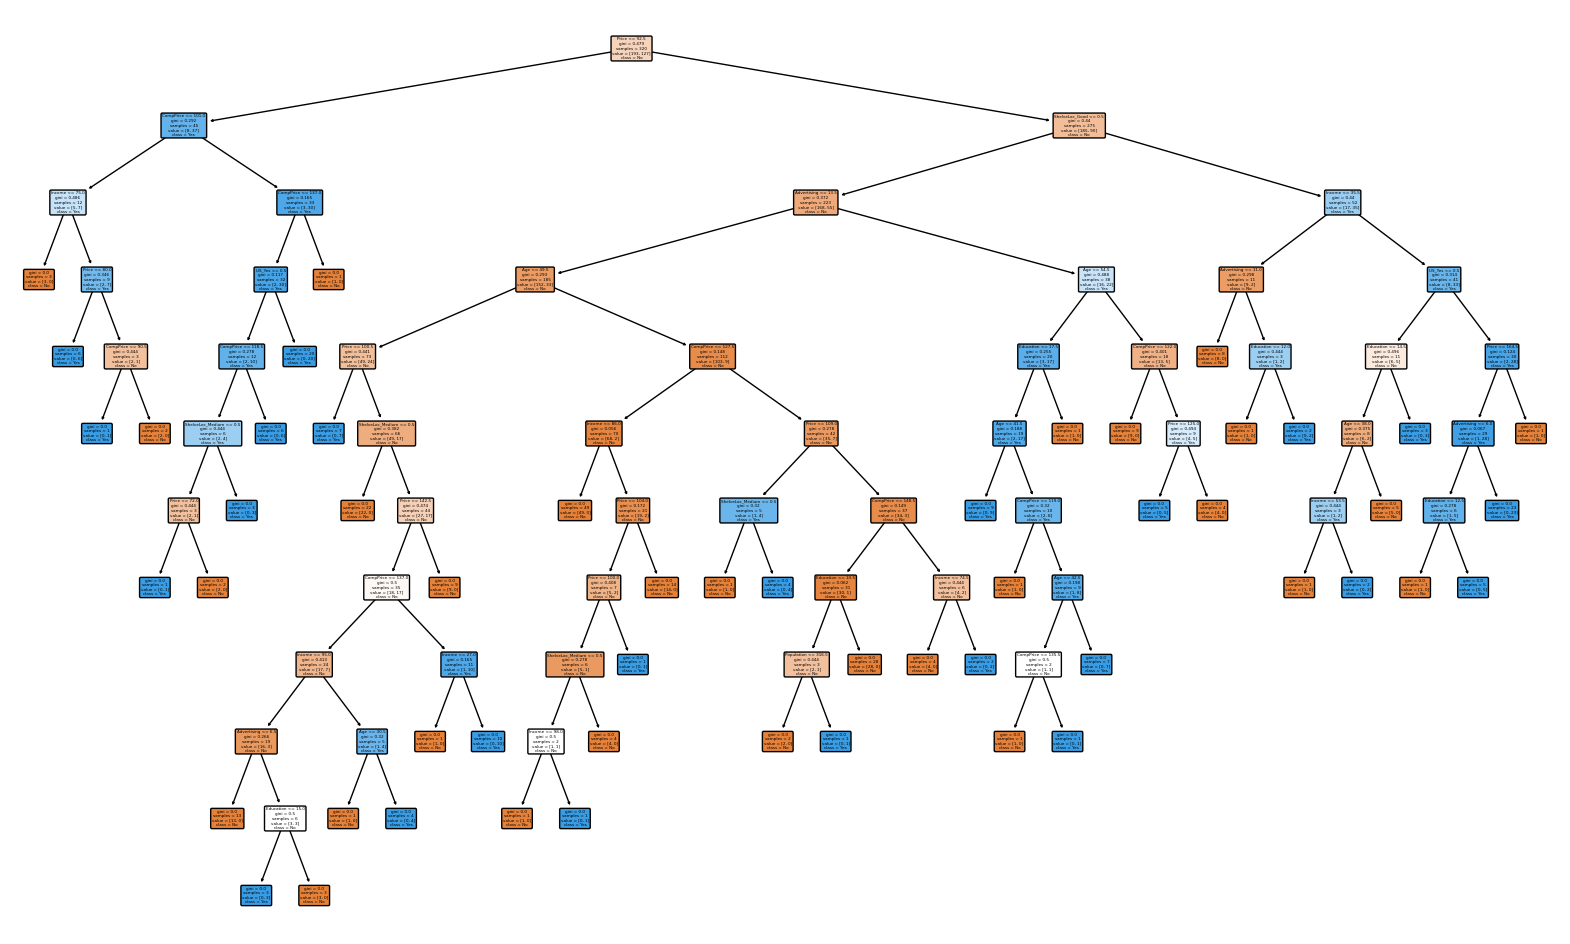

In [85]:
# Resize the plot area
plt.figure(figsize=(20, 12))

# Plot the decision tree
plot_tree(class_mod, feature_names=X.columns.tolist(), class_names=class_mod.classes_, filled=True, rounded=True)

# To display node labels with category names
# Note: You'll need to have the graphviz library installed for this step
# You can install it using 'pip install graphviz'
dot_data = Source(tree.export_graphviz(class_mod, out_file=None, feature_names=X.columns.tolist(), class_names=class_mod.classes_, filled=True, rounded=True))
dot_data.view()


In [86]:
# Make predictions on the test data
y_pred = class_mod.predict(X_test)

# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=["Yes", "No"])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[25 12]
 [ 8 35]]


In [87]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.81      0.78        43
         Yes       0.76      0.68      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80



In [88]:
# Assuming 'X_train' and 'y_train' are your training data and labels
class_mod1 = DecisionTreeClassifier()

# Perform cross-validation with different criteria (misclassification error)
criteria = ["gini", "entropy"]
cv_scores = []

for criterion in criteria:
    model = DecisionTreeClassifier(criterion=criterion)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best criterion
best_criterion = criteria[cv_scores.index(max(cv_scores))]

# Re-create the decision tree classifier with the best criterion
class_mod1 = DecisionTreeClassifier(criterion=best_criterion)
class_mod1.fit(X_train, y_train)

# Now, you can use class_mod1 for further analysis or prediction

# Print the best criterion

print("Best Criterion:", best_criterion)


Best Criterion: entropy


In [95]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create lists to store error rates
error_rates_terminal_node = []
error_rates_alpha = []

In [97]:
# Create a range of values for max_leaf_nodes and ccp_alpha
max_leaf_nodes_range = range(2, 21)  # Example: Vary max_leaf_nodes from 2 to 20
alpha_range = np.linspace(0, 0.09, num=11)  # Example: Vary ccp_alpha from 0 to 0.1 with 0.01 increments

# Iterate through max_leaf_nodes
for max_leaf_nodes in max_leaf_nodes_range:
    # Create and train the decision tree classifier
    tree_model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    tree_model.fit(X_train, y_train)

    # Calculate error rate on the validation set
    val_predictions = tree_model.predict(X_val)
    error_rate = 1 - (val_predictions == y_val).mean()
    error_rates_terminal_node.append(error_rate)

# Iterate through ccp_alpha values
for alpha in alpha_range:
    # Create and train the decision tree classifier with ccp_alpha
    tree_model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    tree_model.fit(X_train, y_train)

    # Calculate error rate on the validation set
    val_predictions = tree_model.predict(X_val)
    error_rate = 1 - (val_predictions == y_val).mean()
    error_rates_alpha.append(error_rate)

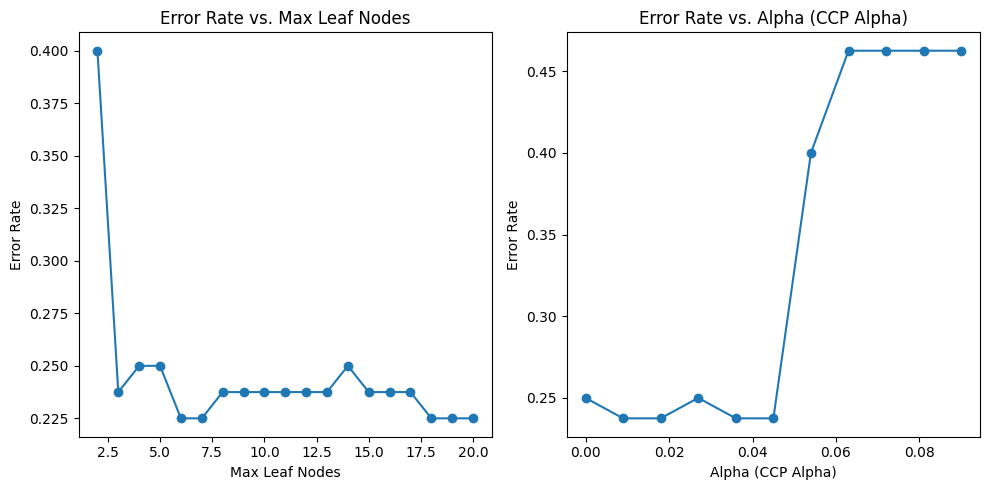

In [98]:
# Plot the error rates vs. max_leaf_nodes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(max_leaf_nodes_range, error_rates_terminal_node, marker='o', linestyle='-')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Max Leaf Nodes')

# Plot the error rates vs. ccp_alpha
plt.subplot(1, 2, 2)
plt.plot(alpha_range, error_rates_alpha, marker='o', linestyle='-')
plt.xlabel('Alpha (CCP Alpha)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Alpha (CCP Alpha)')

plt.tight_layout()
plt.show()


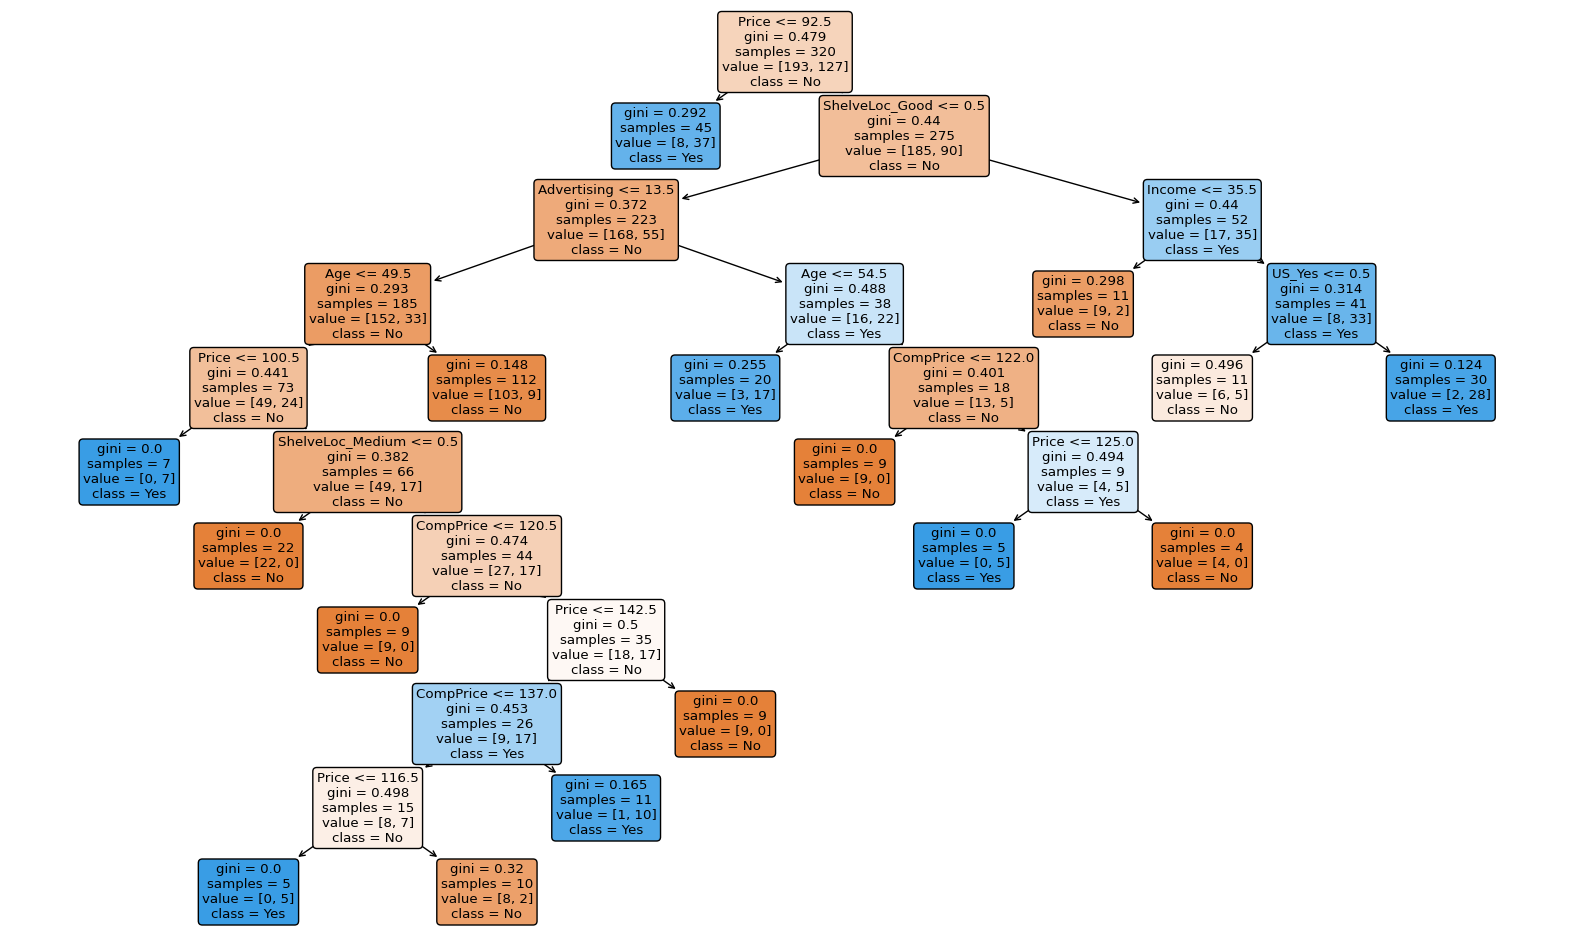

In [91]:
# Prune the decision tree using the ccp_alpha parameter (use the best ccp_alpha value you found)
best_ccp_alpha = 0.01  # Replace with your best ccp_alpha value
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=20)
pruned_tree.fit(X_train, y_train)

# Plot the pruned tree structure with labels
plt.figure(figsize=(20, 12))
plot_tree(pruned_tree, feature_names=X.columns.tolist(), class_names=pruned_tree.classes_, filled=True, rounded=True)

# To display node labels with category names (requires graphviz)
# Note: You'll need to have the graphviz library installed for this step
# You can install it using 'pip install graphviz'
dot_data = Source(tree.export_graphviz(pruned_tree, out_file=None, feature_names=X.columns.tolist(), class_names=pruned_tree.classes_, filled=True, rounded=True))
dot_data.view()

plt.show()


In [99]:
# Predict using the pruned decision tree model
class_pred_test1 = pruned_tree.predict(class_test.drop(columns=['High_Sales']))

# Create a confusion matrix
confusion = confusion_matrix(High_test, class_pred_test1, labels=["Yes", "No"])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Print a classification report for additional metrics
report = classification_report(High_test, class_pred_test1)
print("Classification Report:")
print(report)


Confusion Matrix:
[[74 14]
 [13 99]]
Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.88      0.88       112
         Yes       0.85      0.84      0.85        88

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

